In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [6]:
# We now create an AgentState - shared data structure that keeps track of information as your application runs. 
class AgentSatate(TypedDict): # Our state schema
    message: str
    
# Simple node
def greeting_node(state: AgentSatate) -> AgentSatate:
    """
    Simple node that adds a greeting message to the state
    """
    
    state["message"] = "Hey " + state["message"]+ ", how is your daying going?"
    
    return state

In [7]:
# Building the graph
graph = StateGraph(AgentSatate)

# Add node (name of the node, the action it will perform)
graph.add_node("greeter_node", greeting_node)

# Adding entry and finish points
graph.set_entry_point("greeter_node")
graph.set_finish_point("greeter_node")

# Finally build the graph
app = graph.compile()

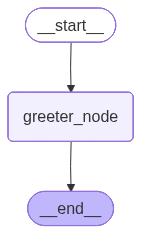

In [8]:
# Visulaize the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
# run graph
app.invoke({
    "message": "szoboslai"
})

{'message': 'Hey szoboslai, how is your daying going?'}

In [14]:
result = app.invoke({
    "message": "szoboslai"
})

result["message"]

'Hey szoboslai, how is your daying going?'